<h1><center>K-Mean Clustering</center></h1>
<p>K Mean is a unsupervised algorithm used for clustering. This notebook is used to study K-Mean clustering algorithm by implementing it to cluster the iris dataset according to the main features that is Sepal Length, Sepal Width, Petal Length and Petal Width. </p>
<b>About the dataset from origin site</b>
<i>This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.</i>

<b>Import required libraries</b>

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

<b>Load dataset from in-built library</b>

In [8]:
X, y = load_iris(return_X_y=True)

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<h4>Choosing the Appropriate Number of Clusters</h4>
<p>Now we need to find out the appropriate no of clusters to be formed.
For that we need to use either Elbow method or silhouette coefficient method.</p>
<h5>Elbow method</h5>
<p> The elbow method serves as a visual technique to identify the appropriate value of K in a K-Mean clustering algorithm. The elbow graph illustrates within-cluster-sum-of-square (WCSS) values on the y-axis in relation to various K values on the x-axis. The optimal K value is decided at the point where the graph creates an elbow.</p>
<h5>Silhouette coefficient</h5>
<p> This is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.</p>


In [9]:
sse = []
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X)
	sse.append(km.inertia_)

<p>Here we have tried with k values from 1 to 10 and calculate the inertia_ (which is an attribute of the KMeans model gives the sum of squared distances of samples to their closest cluster center) of each model with that much number of clustering.</p>

In [10]:
sse

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 49.84221386276559,
 41.84030072463769,
 37.74396635382162,
 30.900849644937107,
 28.38373022248538,
 26.546196672701818]

<b>Plot Elbow </b>

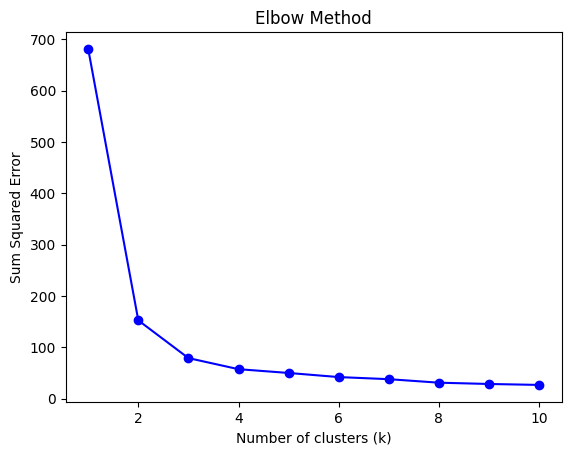

In [11]:
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum Squared Error")
plt.title("Elbow Method")

# Display the plot
plt.show()

From the Elbow graph we can understand that the optimum k value is 3.

<b>Create K-Mean Model</b>

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 2)

<b>Train the model</b>

In [13]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

<b>Retrieving center of each clusters from model</b>

cluster_centers_ attribute provides the coordinates of the cluster centers in the feature space.

In [14]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

<b>Predict with the test data</b>

In [15]:
pred = kmeans.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<b>Plot the clusters</b>

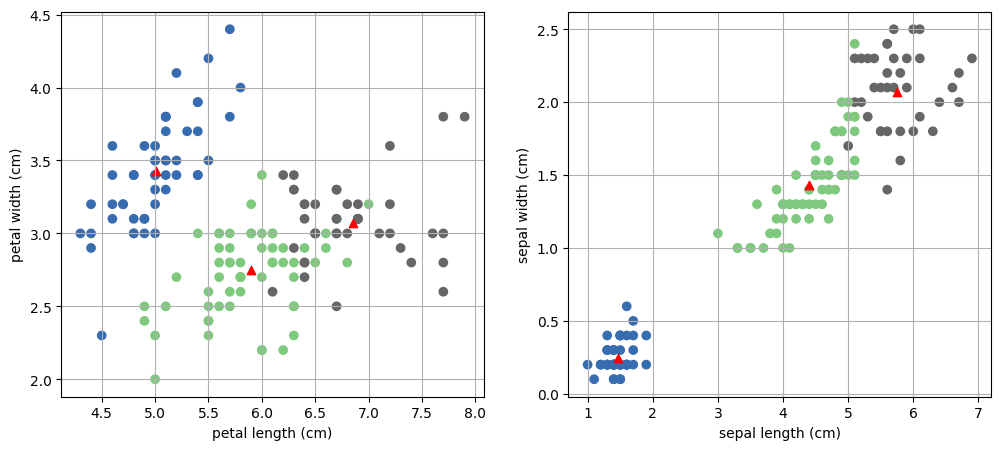

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[:2]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
	
plt.subplot(1,2,2) 
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[2:4]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()